# Solve differential equations using python
**References**:

1. Differentiation and Integrataion overview from [the essence of calculus](https://www.youtube.com/watch?v=WUvTyaaNkzM)
2. Solving differential equations using odeint - [YouTube video](https://www.youtube.com/watch?v=VV3BnroVjZo)
3. [APMonitor website](https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations) - having the problems


ODEINT requires three inputs:

$y = odeint(model, y_0, t)$

1. **model**: Function name that returns derivative values at requested y and t values ad dydt=model(y, t)
2. **$y_0$**: initial conditions of differential states
3. **t**: time points at which solution is to be reported.

Let us solve the following equation:
$\large \frac{dy}{dt} = -k*y(t)$

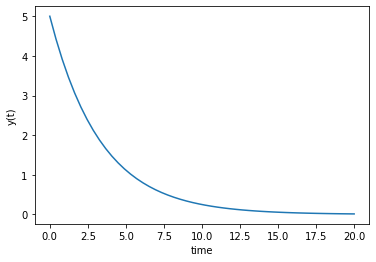

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y, t):
    k = 0.3
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0, 20) # defaults to 50 points

# solve ODE
y = odeint(model, y0, t)

# plot results
plt.plot(t, y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()




An optional fourth input is *args* that allows additional input to be passed into *model* function

 - The *args* input is a tuple sequence of values
 - The argument *k* is now an input to the *model* function by including an additional argument 

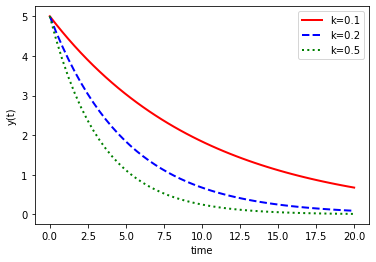

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y, t, k):
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0, 20) # defaults to 50 points

# solve ode
k = 0.1
y1 = odeint(model, y0, t, args=(k, ))

k = 0.2
y2 = odeint(model, y0, t, args=(k, ))

k = 0.3
y3 = odeint(model, y0, t, args=(k, ))

# plot results
plt.plot(t,y1,'r-',linewidth=2,label='k=0.1')
plt.plot(t,y2,'b--',linewidth=2,label='k=0.2')
plt.plot(t,y3,'g:',linewidth=2,label='k=0.5')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

Let us try to solve the most complex differential equation (Problem 4)

Solve for $x(t)$ and $y(t)$ and show that the solutions are equivalent

$\frac {\large{dx(t)}}{\large{d(t)}} = -x(t) \; + u(t)$

$\frac {\large{dy(t)}}{\large{d(t)}} = -y(t) + x(t)$

$u = 2S(t=5), x(0) = 0, y(0) = 0$

where:

- $S(t-5)$ is a step function that changes from zero to one at $t=5$. 
- when it is multiplied by two, it changes from zero to two at the same time, t = 5.


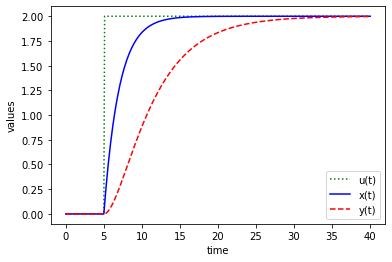

In [13]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Function returning dz/dt
def model(z, t, u):
    x = z[0]
    y = z[1]
    dxdt = (-x + u)/2.0
    dydt = (-y + x)/5.0
    dzdt = [dxdt, dydt]
    return dzdt

# initial condition
z0 = [0, 0]

# number of timepoints
n = 401

# time points
t = np.linspace(0, 40, n)

# step input
u = np.zeros(n)
# change to 2.0 at time = 5.0
u[51:] = 2.0

# store solution
x = np.empty_like(t)
y = np.empty_like(t)
# record initial conditions
x[0] = z0[0]
y[0] = z0[1]

# solve ODE
for i in range(1, n):
    # span for next time step
    tspan = [t[i-1], t[i]]
    # solve for next step
    z = odeint(model, z0, tspan, args=(u[i], ))
    # store solution for plotting
    x[i] = z[1][0]
    y[i] = z[1][1]
    # next initial condition
    z0 = z[1]

# plot results
plt.plot(t, u, 'g:', label= 'u(t)')
plt.plot(t, x, 'b-', label= 'x(t)')
plt.plot(t, y, 'r--', label= 'y(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()